# Proyecto 1

## Integrantes

* Maria Paula Gonzalez Escallon 
* Jessica Alejandra Robles Moreno
* Juan Esteban Vergara Ascencio

# Importar

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

## Carga de Datos

In [2]:
df_info=pd.read_csv('SuicidiosProyecto.csv', sep=',', decimal=',', encoding = 'utf-8', index_col=0)

In [3]:
df_info.shape

(195700, 2)

In [4]:
df_info.head()

text        class
Unnamed: 0                                                                
173271      i want to destroy myselffor once everything wa...      suicide
336321      I kinda got behind schedule with learning for ...  non-suicide
256637      I'm just not sure anymoreFirst and foremost: I...      suicide
303772      please give me a reason to liveThats too much ...      suicide
293747      27f struggling to find meaning moving forwardI...      suicide

In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195700 entries, 173271 to 305170
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    195700 non-null  object
 1   class   195700 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [6]:
df_info["class"].value_counts()

non-suicide    110165
suicide         85535
Name: class, dtype: int64

## Limpieza de datos

In [7]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [8]:
df_info.head()["text"].apply(tokenize)

Unnamed: 0
173271    [i, want, to, destroy, myselffor, once, everyt...
336321    [i, kinda, got, behind, schedule, with, learni...
256637    [im, just, not, sure, anymorefirst, and, forem...
303772    [please, give, me, a, reason, to, livethats, t...
293747    [27f, struggling, to, find, meaning, moving, f...
Name: text, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)

In [10]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(df_info["text"], df_info["class"], stratify=df_info["class"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 146775, testing examples 48925


In [11]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

In [31]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier = classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [32]:
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 93.4410%


In [33]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones)

array([[26586,   955],
       [ 2254, 19130]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


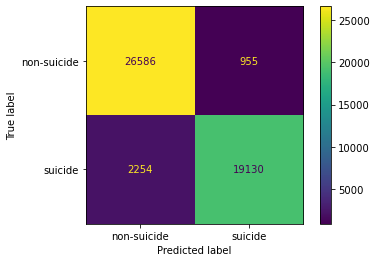

In [35]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier, test_X, test_labels)  
plt.show()

In [39]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones))
print('Exactitud: %.2f' % accuracy_score(test_labels, predicciones))
print("Recall: {}".format(recall_score(real_vectorizer.transform(test_labels), predicciones)))
print("Precisión: {}".format(precision_score(real_vectorizer.fit_transform(test_labels), predicciones)))
print("Puntuación F1: {}".format(f1_score(real_vectorizer.fit_transform(test_labels), predicciones)))

              precision    recall  f1-score   support

 non-suicide       0.92      0.97      0.94     27541
     suicide       0.95      0.89      0.92     21384

    accuracy                           0.93     48925
   macro avg       0.94      0.93      0.93     48925
weighted avg       0.94      0.93      0.93     48925

Exactitud: 0.93


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

## Clasificacion de textos

In [25]:
df_test=pd.read_csv('SuicidiosProyectoSinEtiqueta.csv', sep=',', decimal=',', encoding = 'utf-8', index_col=0)

In [26]:
df_test.shape

(10300, 1)

In [27]:
df_test.head()

text
Unnamed: 0                                                   
66529       Suicide Thoughts Getting StrongerOK, since the...
293637      Guys, I just asked my crush... if she wanted t...
198884      I'm going to kill myselfOf course I'm not but ...
186897      I did it! I slept facing the wall.\n\nOverall ...
89024       I don't want to be dead...I want to be alive a...

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10300 entries, 66529 to 20052
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10300 non-null  object
dtypes: object(1)
memory usage: 160.9+ KB


### Clasificacion

In [29]:
frases_X = real_vectorizer.transform(df_test["text"])
predicciones = classifier.predict(frases_X)

In [30]:
for text, label in zip(df_test["text"],predicciones):
  print(f"{label:5} - {text}")

suicide - Suicide Thoughts Getting StrongerOK, since the last time I was here, I've been to see the endo. Link to previous post: https://www.reddit.com/r/SuicideWatch/comments/7rfccf/thinking_death_is_my_only_option/

Can't go on E until I've gone through the process of evaluation &amp; psychiatry with a gender specialist. I'm not sure if Australia has informed consent but it's virtually impossible to find someone here that will deal with me with the other mental health problems I have. So basically I can't even try E to see how I would feel on it. Might as well just forget about being who I am.

For my sexual issues, he added 100mg of Spiro per day to my list of meds. This, on top of the 200mg of Androcur (which I have been taking for a year now) &amp; still I have sexual urges. It also made me feel sick &amp; I did have to stop after about a week. Then, this morning, I was desperate after waking up with all those feelings again so I took another tablet.

Why? It's so depressing to wa

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(train_X, train_labels)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 87.6914%


## Naive Bayers

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(train_X.toarray(), train_labels).predict(test_X)